In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Resources

[OpenEI dataset](https://openei.org/doe-opendata/dataset/1be0a37f-28e5-4021-84bb-39a643250102/resource/bbeccdf5-301e-4390-b503-7d9f8d404986/download/wind50mresourcearea.xlsx)  
[DTU wind atlas](https://globalwindatlas.info/)

### Onshore

In [2]:
windpath='http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx'

In [3]:
wind=pd.read_excel(windpath,sheet_name='Onshore Power',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap={}
for i in wind.T.iteritems():
    country=i[1][0]
    for k in range(1,10):
        if country not in wind_cap:wind_cap[country]={}
        clas=k
        cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_cap[country][clas]=cap/1000.0 #workbook reported values in GW, we use TW

In [4]:
wind=pd.read_excel(windpath,sheet_name='Onshore Energy',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res={}
for i in wind.T.iteritems():
    country=i[1][0]
    for k in range(1,10):
        if country not in wind_res:wind_res[country]={}
        clas=k
        cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
        wind_res[country][clas]=cap*1000.0 #workbook reported values in PWh, we use TWh

Power

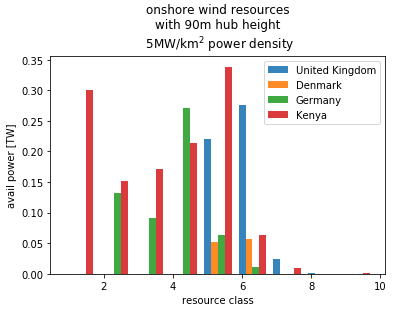

In [5]:
countries=['United Kingdom','Denmark','Germany','Kenya']
for i,country in enumerate(countries):
    plt.bar(np.array(list(wind_cap[country].keys()))+0.2*i,
            wind_cap[country].values(),alpha=0.9,width=0.2,label=country)
plt.ylabel('avail power [TW]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend();

Capacity Factors

In [6]:
cf=pd.read_excel(windpath,sheet_name='General',skiprows=1)
cf=cf[['Wind Classes','Capacity Factor']][:9]
cf

,Wind Classes,Capacity Factor
0,c1,0-0.18
1,c2,0.18-0.22
2,c3,0.22-0.26
3,c4,0.26-0.3
4,c5,0.3-0.34
5,c6,0.34-0.38
6,c7,0.38-0.42
7,c8,0.42-0.46
8,c9,0.46-1.0


Energy

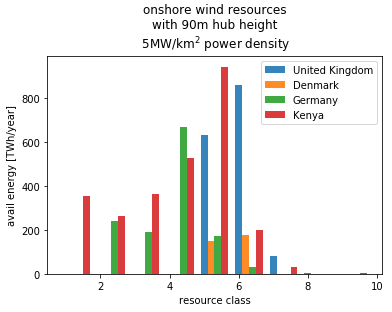

In [7]:
countries=['United Kingdom','Denmark','Germany','Kenya']
for i,country in enumerate(countries):
    plt.bar(np.array(list(wind_res[country].keys()))+0.2*i,
            wind_res[country].values(),alpha=0.9,width=0.2,label=country)
plt.ylabel('avail energy [TWh/year]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('resource class')
plt.legend();

In [8]:
#!pip install plotly

Intall `plotly` if you haven't before.  
Then configure credentials at `~/.plotly/.credentials`.  
Create user and get API key from https://plot.ly/settings/api#/

This workbook run plotly in offline mode.

In [9]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

mpl_fig = plt.figure(figsize=(9,5))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_res[countries[0]].keys()))
    
for i,country in enumerate(countries):
    y=wind_res[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ons1')

### Offshore

Power

In [10]:
wind=pd.read_excel(windpath,sheet_name='Offshore Power',skiprows=3)
wind_cap2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        for k in range(2,11):
            if country not in wind_cap2:wind_cap2[country]={}
            clas=k-1
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            if clas not in wind_cap2[country]:wind_cap2[country][clas]=0
            wind_cap2[country][clas]+=cap/1000.0

In [11]:
countries=['United Kingdom','Denmark','Germany','Chile']
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_cap2[countries[0]].keys()))
    
for i,country in enumerate(countries):
    y=wind_cap2[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available power [TW]')
ax.set_xlabel('Resource class')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ofs1')

Energy

In [12]:
wind=pd.read_excel(windpath,sheet_name='Offshore Energy',skiprows=3)
wind_res2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        for k in range(2,11):
            if country not in wind_res2:wind_res2[country]={}
            clas=k-1
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            if clas not in wind_res2[country]:wind_res2[country][clas]=0
            wind_res2[country][clas]+=cap*1000.0

In [13]:
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=np.array(list(wind_res2[countries[0]].keys()))
    
for i,country in enumerate(countries):
    y=wind_res2[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy [TWh/year]')
ax.set_xlabel('Resource class')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ofs2')

### Convert wind classes to *m/s* speeds

https://www.nrel.gov/gis/data-wind.html

In [14]:
df=pd.read_html('https://www.nrel.gov/gis/data-wind.html')[0]

In [15]:
df=df[1::2].reset_index()

In [16]:
df2=df.copy()
df2.columns=df2.loc[0]
df=df[1:]

In [17]:
df2[1:]

,1,Wind Power Density (W/m2),Speedb m/s (mph),Wind Power Density (W/m2),Speedb m/s (mph),nan
1,3,100,4.4 (9.8),200,5.6 (12.5),NaN
2,5,150,5.1 (11.5),300,6.4 (14.3),NaN
3,7,200,5.6 (12.5),400,7.0 (15.7),NaN
4,9,250,6.0 (13.4),500,7.5 (16.8),NaN
5,11,300,6.4 (14.3),600,8.0 (17.9),NaN
6,13,400,7.0 (15.7),800,8.8 (19.7),NaN
7,15,1000,9.4 (21.1),2000,11.9 (26.6),NaN


In [18]:
classes=list(df.index) #extract classes

In [19]:
x10m=np.array([float(i[:i.find(' ')]) for i in df[1]]) #wind speed at 10m hub height
x50m=np.array([float(i[:i.find(' ')]) for i in df[3]]) #wind speed at 50m hub height

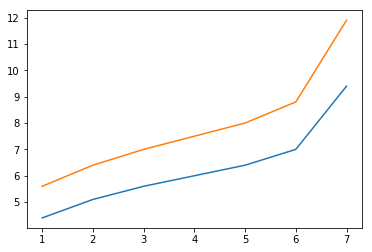

In [20]:
plt.plot(classes,x10m)
plt.plot(classes,x50m)

http://windpower.generatorguide.net/wind-speed-power.html

In [21]:
def height_converter(h,href,vref):
    return vref*(h*1.0/href)**(1/7)

In [22]:
x90m1=height_converter(90,10,x10m)
x90m2=height_converter(90,50,x50m)
x90m=(x90m1+x90m2)/2.0

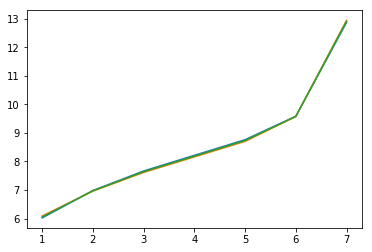

In [23]:
plt.plot(classes,x90m1)
plt.plot(classes,x90m2)
plt.plot(classes,x90m)

Cast the NREL 7 classes into the map's 9 classes.

In [24]:
x90m9cl=np.array(list(x90m[:-1])+[x90m[-2]+(x90m[-1]-x90m[-2])*1/3,
                                  x90m[-2]+(x90m[-1]-x90m[-2])*2/3,
                                  x90m[-1]])

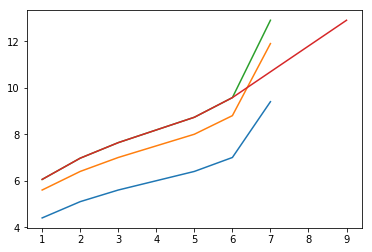

In [25]:
plt.plot(classes,x10m)
plt.plot(classes,x50m)
plt.plot(classes,x90m)
plt.plot(classes+[8,9],x90m9cl)

In [26]:
class2speed={i+1:np.round(x90m9cl[i],1) for i in range(len(x90m9cl))}

New plot with speeds

In [27]:
countries=['United Kingdom','Denmark','Germany','Chile']
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=[class2speed[i] for i in wind_res[countries[0]].keys()]
    
for i,country in enumerate(countries):
    y=wind_res[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy (TWh/year)')
ax.set_xlabel('Wind speed (m/s)')
ax.set_title('Onshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ons3')

In [28]:
mpl_fig = plt.figure(figsize=(9,6))
ax = mpl_fig.add_subplot(111)
x=[class2speed[i] for i in wind_res2[countries[0]].keys()]
    
for i,country in enumerate(countries):
    y=wind_res2[country].values()
    ax.bar(x,y,width=0.8)
ax.set_ylabel('Available energy (TWh/year)')
ax.set_xlabel('Wind speed (m/s)')
ax.set_title('Offshore wind resources')
plotly_fig = tls.mpl_to_plotly(mpl_fig)
for i,e in enumerate(plotly_fig['data']):
    e['name']=countries[i]
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ofs3')

## Turbines

In [29]:
df=pd.read_excel('data/wind_farms_with_ws_2k_5k_sgouris edited.xlsx',sheet_name='BASE')
df=df.dropna()
turbines=df.set_index(['ISO_CODE','Year'])

In [30]:
turbines.head()

ID OFFSHORE POWER_KW   WS_est
ISO_CODE Year                                 
FR       2003.0   1       no    12000  8.55312
         2003.0   2       no     7500  8.58871
         2005.0   5       no    11900  8.30861
         2002.0   6       no     8000  6.72163
         2002.0   7       no     1500  6.72163

### Onshore

In [318]:
def projects(df,c,offshore=False,cumulative=True,mincap=0,minyear=0):
    x=[]
    y=[]
    z=[]
    w=[]
    for i in df.loc[c].sort_index().index.unique():
        x.append(i)
        if cumulative:
            dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k<=i]]
        else:
            dz=df.loc[c].loc[[k for k in df.loc[c].index.unique() if k==i]]
        y.append(np.average(dz['WS_est'].astype(float).values))
        try:
            z.append(np.average(dz['WS_est'],weights=dz['POWER_KW'].astype(float).values))
        except:
            z.append(np.average(dz['WS_est']))
        w.append(np.sum(dz['POWER_KW']))
    if offshore:
        if minyear==0:minyear=minyear_ofs*1.0
        if mincap==0:mincap=mincap_ofs*1.0
    else:
        if minyear==0:minyear=minyear_ons*1.0
        if mincap==0:mincap=mincap_ons*1.0
    if not cumulative:mincap=1
    rs=[r for r in range(len(x)) if x[r]>=minyear and w[r]>=mincap]
    x=np.array(x)[rs]
    y=np.array(y)[rs]
    z=np.array(z)[rs]
    w=np.array(w)[rs]
    return x,y,z,w

In [982]:
ons=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='no'))]
ofs=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='yes'))]

In [983]:
#filter dataset to min year and min cap
minyear_ons=1990
minyear_ofs=2000
mincap_ons=10000 #kW
mincap_ofs=10000 #kW

Custom `mincap` and `minyear`

In [984]:
countries=[{'BR','AR','GB','CA','US','IN'},{'FR','DE','CN','IT','ES','GB'}]


fig, ax = plt.subplots(1,2,figsize=(9,5))
for s in range(len(countries)):
    for c in countries[s]:
        x,y,z,w=projects(ons,c,offshore=False,mincap=0.1,minyear=1980)
        ax[s].plot(x,z,label=c)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ons4')

Default plots

In [985]:
countries=[{'BR','AR','GB','CA','US','IN'},{'FR','DE','CN','IT','ES','GB'}]


fig, ax = plt.subplots(1,2,figsize=(9,5))
for s in range(len(countries)):
    for c in countries[s]:
        x,y,z,w=projects(ons,c,offshore=False)
        ax[s].plot(x,z,label=c)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ons4')

### Offshore

In [986]:
df=turbines[((turbines['POWER_KW'].replace('#ND',0).astype(int)>0)&\
       (turbines['POWER_KW'].replace('#ND',0).astype(int)<1000000)&(turbines['OFFSHORE']=='yes'))]
countries=[{'GB','US','IN','CN','FR','DE'},{'GB'}]


fig, ax = plt.subplots(1,2,figsize=(9,5))
for s in range(len(countries)):
    for c in countries[s]:
        x,y,z,w=projects(ofs,c,offshore=True)
        ax[s].plot(x,z,label=c)

    ax[s].set_ylabel('Capacity weighted mean windspeed [m/s]')
    ax[s].set_title("Onshore turbines | Cumulative")

plotly_fig = tls.mpl_to_plotly(fig)
plotly_fig["layout"]["showlegend"] = True
plotly_fig["layout"]['hovermode']='x'
iplot(plotly_fig, filename='ofs4')

Compare turbines with resources

Install country name converter

In [987]:
#!pip install pycountry

In [988]:
import pycountry
countries=list(pycountry.countries)

In [1114]:
def cnc(cs):
    c2s=[]
    cdict={i.alpha_2:i.name for i in countries if i.alpha_2 in cs}
    for ci in range(len(cs)):
        c=cdict[cs[ci]]
        if c in wind_res.keys():
            c2s.append(c)
        elif c=='United States': 
            c2s.append('United States of America')
        elif c=='Korea, Republic of': 
            c2s.append('Republic of Korea')
        elif c=='Czechia': 
            c2s.append('Czech Republic')
        elif c=='Venezuela, Bolivarian Republic of': 
            c2s.append('Venezuela')
        elif c=='Iran, Islamic Republic of': 
            c2s.append('Iran (Islamic Republic of)')
        elif c=='Taiwan, Province of China': 
            c2s.append('Taiwan')
        elif c=='Bolivia, Plurinational State of': 
            c2s.append('Bolivia')
        elif c=='Tanzania, United Republic of': 
            c2s.append('United Republic of Tanzania')
        elif c=='Macedonia, Republic of': 
            c2s.append('TFYR Macedonia')
        else:
            c2s.append('Unassigned Resource (~3/4 is Alaska)')
    return c2s

Pretty country names for labelling

In [1115]:
def pretty(c):
    if c=='United States of America': return 'United States'
    return c

Define main plotter function

In [1099]:
def plotter(df,cs,c2s,colors,offshore=True,cumulative=True,axistype='linear',mincap=0,minyear=0,minclass=0.1):
    fig = tools.make_subplots(rows=1, cols=3, print_grid=False);
    axes=[]
    smoothing=[0.4,0.9]
    if offshore:
        tl='Offshore'
        res=wind_res2
    else:
        tl='Onshore'
        res=wind_res
    if cumulative:
        cumu='Cumulative'
    else:
        cumu='Yearly'
    for i in range(len(cs)):
        c=cs[i]
        c2=c2s[i]
        c3=pretty(c2)
        x,y,z,w=projects(df,c,cumulative=cumulative,offshore=offshore,mincap=mincap,minyear=minyear)
        xh=[i for i in res[c2].keys()] #helper
        x2=[class2speed[i] for i in res[c2].keys()]
        y2=np.array(list(res[c2].values()))
        #'''
        #filter to nonzero classes
        rs=[r for r in range(len(y2)) if y2[r]>minclass]
        xh2=np.array(xh)[rs]
        if min(xh2)>min(xh):
            rs=np.insert(rs,0,rs[0]-1)
        if max(xh2)<max(xh):
            rs=np.insert(rs,len(rs),rs[-1]+1)
        x2=np.array(x2)[rs]
        y2=np.array(y2)[rs]
        #'''
        #calculate average resource class, weighted by available capacity in each class 
        x2a=np.average(x2,weights=y2)
        fig.append_trace(
            go.Scatter(x=y2,y=x2,
                mode = 'lines',
                fill='tozerox',
                hoveron='fills',
                legendgroup= c3,
                name = c3,
                line=dict(
                    color=colors[i],
                    shape='spline',
                    smoothing=smoothing[1]
                )
            ),1,1
        ); axes.append({'x':'','y':''});
        fig.append_trace(
            go.Scatter(x=[-100],y=[x2a],
                legendgroup= c3,
                name = 'mean '+c,       
                marker=dict(
                    color=colors[i],
                ),
                showlegend=False
            ),1,1
        ); axes.append({'x':'','y':''});
        fig.append_trace(
            go.Scatter(x=x,y=z,
                mode = 'lines',
                name = 'wind speed '+c,  
                legendgroup= c3,
                line=dict(
                    color=colors[i],
                    shape='spline',
                    smoothing=smoothing[0]
                ),
                showlegend=False
            ),1,2
        ); axes.append({'x':'2','y':''});
        fig.append_trace(
            go.Scatter(x=x,y=np.array(w)/1e6, #kW to GW conversion
                mode = 'lines',
                name = 'capacity '+c,  
                legendgroup= c3,
                line=dict(
                    color=colors[i],
                    shape='spline',
                    dash='dash',
                    smoothing=smoothing[0]
                ),
                showlegend=False
            ),1,3
        ); axes.append({'x':'2','y':'2'});

    for i in range(len(fig['data'])):
        fig['data'][i]['xaxis']='x'+axes[i]['x']
        fig['data'][i]['yaxis']='y'+axes[i]['y']

    layout = go.Layout(
        xaxis=dict(
            domain=[0, 0.3],
            title='Available power (TW)',
            autorange='reversed',
            type=axistype
        ),
        yaxis=dict(
            title='Wind speed (m/s)',
            hoverformat = '.2f',
            zeroline=False
        ),
        xaxis2=dict(
            domain=[0.3, 1],
            title='Year'
        ),
        yaxis2=dict(
            overlaying='y',
            showgrid=False,
            side='right',
            anchor='x2',
            hoverformat = '.2f',
            title=cumu+' project capacity (GW)',
            zeroline=False
        ),
        title=tl+' wind resources vs. projects by capacity weighted average wind speed',
        legend=dict(
            orientation='h',
            x=0.55,
            y=1,
            xanchor='center'
        )
    )
    fig["layout"]=layout
    fig["layout"]["showlegend"] = True
    fig["layout"]['hovermode']='x'
    return fig

In [1100]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [993]:
cs=['GB','DE','FR']
c2s=['United Kingdom','Germany','France']
#generate nice colorscale: http://paletton.com
colors=['#AA5585','#499272','#D4CB6A']

In [994]:
iplot(plotter(ons,cs,c2s,colors,offshore=False,cumulative=True), filename='ons1')

In [995]:
iplot(plotter(ons,cs,c2s,colors,offshore=False,cumulative=False), filename='ons2')

In [996]:
iplot(plotter(ofs,cs,c2s,colors,offshore=True,cumulative=True), filename='ofs1')

In [997]:
iplot(plotter(ofs,cs,c2s,colors,offshore=True,cumulative=False), filename='ofs2')


Select countries to conisder (those with 50 projects at least) to further data collection

In [998]:
onsk=ons.groupby('ISO_CODE')[['ID']].nunique().\
    reset_index().set_index('ID').sort_index(ascending=False)
ofsk=ofs.groupby('ISO_CODE')[['ID']].nunique().\
    reset_index().set_index('ID').sort_index(ascending=False)

In [1006]:
#countries with more than k projects
onsk2=onsk[onsk.index>20]#50
ofsk2=ofsk[ofsk.index>5]#10

In [1011]:
#kW to GW conversion
onsj=(ons.groupby('ISO_CODE')[['POWER_KW']].sum()).\
    reset_index().set_index('POWER_KW').sort_index(ascending=False)
ofsj=(ofs.groupby('ISO_CODE')[['POWER_KW']].sum()).\
    reset_index().set_index('POWER_KW').sort_index(ascending=False)

In [1012]:
#top j countries by total capacity of projects
onsj2=onsj[onsj.index>mincap_ons]
ofsj2=ofsj[ofsj.index>mincap_ofs]

In [1014]:
#!pip install squarify

In [1015]:
import squarify

In [1016]:
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    return ['rgb('+str(int(i[:2], 16))+','+\
                str(int(i[2:4], 16))+','+\
                str(int(i[4:], 16))+')' for i in colors]

In [1017]:
#!pip install colorbrewer

In [1018]:
import colorbrewer as cb

In [1019]:
def colorme(n,light=False):
    if light:cbase=cb.Pastel2
    else: cbase=cb.Dark2
    cbase2=cb.Accent
    colors=[]
    m1=max(cbase)
    if n<=m1:
        colors=cbase[max(n,min(cbase))]
    m2=max(cbase2)
    if n<=m1+m2:
        colors=cbase[m1]+cbase2[max(n-m1,min(cbase2))]
    else:
        return cbase[m1]+cbase[m2]+colorme(n-(m1+m2),light=light)
    return colors[:n]

In [1020]:
def rgbfy(a):
    return ['rgb'+str(i) for i in a]

In [1034]:
def tree_plotter(df,colors,gid):
    x = 0.
    y = 0.
    width = 100.
    height = 100.

    values = np.array(df.index)
    labels=np.array(df.values).squeeze()

    normed = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(normed, x, y, width, height)
    shapes = []
    annotations = []
    annotationsl =[]
    for i,r in enumerate(rects):
        shapes.append( 
            dict(
                type = 'rect', 
                x0 = r['x'], 
                y0 = r['y'], 
                x1 = r['x']+r['dx'], 
                y1 = r['y']+r['dy'],
                line = dict( width = 2 ),
                fillcolor=colors[i]
            ),
        )
        if gid%2==0:divider=1.0
        else:divider=1e6
        if i<10: label=labels[i]+'<br>'+str(np.round(values[i]/divider,1))
        elif i<30: label=labels[i]
        else: label=''
        annotationsl.append(label)
        annotations.append(
            dict(
                x = r['x']+(r['dx']/2),
                y = r['y']+(r['dy']/2),
                text = label,
                font=dict(size=25),
                showarrow = False,
            )
        )

    # For hover text
    trace0 = go.Scatter(
        x = [ r['x']+(r['dx']/2) for r in rects ], 
        y = [ r['y']+(r['dy']/2) for r in rects ],
        text = annotationsl, 
        mode = 'text',
    )

    layout = dict(
        height=700, 
        width=700,
        xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
        yaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
        shapes=shapes,
        annotations=annotations,
        hovermode='closest'
    )

    # With hovertext
    fig = dict(data=[trace0], layout=layout)
    return fig

In [1035]:
ds=['Onshore number of projects','Onshore total capacity (GW)',
    'Offshore number of projects','Offshore total capacity (GW)']
dgs=[onsk2,onsj2,ofsk2,ofsj2]
for d in range(len(ds)):
    colors3=rgbfy(colorme(len(dgs[d]),light=True))
    fig=tree_plotter(dgs[d],colors3,d)
    fig['layout']['title']=ds[d]
    iplot(fig, filename='ofs_tree')

Plot first *k*

In [1036]:
cs=onsk2[:6].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))

In [1037]:
iplot(plotter(ons,cs,c2s,colors3,offshore=False,cumulative=True,axistype='log'), filename='onsk')

In [1038]:
cs=ofsk2[:6].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))

In [1039]:
iplot(plotter(ofs,cs,c2s,colors3,offshore=True,cumulative=True,axistype='log'), filename='ofsk')

In [1040]:
cs=onsj2.loc[onsj2.index[:6]].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(plotter(ons,cs,c2s,colors3,offshore=False,cumulative=True,axistype='log'), filename='onsj')

In [1041]:
def megaplotter(df,cs,c2s,colors,offshore=True,cumulative=True,axistype='linear',mincap=0,minyear=0,minclass=0.1,stacked=False):
    fig = tools.make_subplots(rows=2, cols=3, print_grid=False);
    axes=[]
    nr_plots=4
    smoothing=[0.4,0.9]
    if offshore:
        tl='Offshore'
        res=wind_res2
    else:
        tl='Onshore'
        res=wind_res
    if cumulative:
        cumu='Cumulative'
    else:
        cumu='Yearly'
    for i in range(len(cs)):
        c=cs[i]
        c2=c2s[i]
        c3=pretty(c2)
        x,y,z,w=projects(df,c,cumulative=cumulative,offshore=offshore,mincap=mincap,minyear=minyear)
        xh=[i for i in res[c2].keys()] #helper
        x2=[class2speed[i] for i in res[c2].keys()]
        y2=np.array(list(res[c2].values()))
        #filter to nonzero classes
        rs=[r for r in range(len(y2)) if y2[r]>minclass]
        xh2=np.array(xh)[rs]
        if min(xh2)>min(xh):
            rs=np.insert(rs,0,rs[0]-1)
        if max(xh2)<max(xh):
            rs=np.insert(rs,len(rs),rs[-1]+1)
        x2=np.array(x2)[rs]
        y2=np.array(y2)[rs]
        if len(x)>1:
            #calculate average resource class, weighted by available capacity in each class 
            x2a=np.average(x2,weights=y2)
            if len(axes)/nr_plots>10: showlegend=False
            else: showlegend=True
            if stacked:
                fig.append_trace(
                    go.Scatter(x=y2,y=x2,
                        mode='lines',
                        #fillcolor=colors[i].replace(')',',0.5)').replace('b','ba'),
                        stackgroup='one',
                        orientation='h',
                        hoveron='fills',
                        legendgroup= c3,
                        name = c3,
                        showlegend=showlegend,
                        line=dict(
                            color=colors[i],
                            shape='spline',
                            smoothing=smoothing[1]
                        )
                    ),2,3
                );
            else:
                fig.append_trace(
                    go.Scatter(x=y2,y=x2,
                        mode = 'lines',
                        fill='tozerox',
                        hoveron='fills',
                        legendgroup= c3,
                        name = c3,
                        showlegend=showlegend,
                        line=dict(
                            color=colors[i],
                            shape='spline',
                            smoothing=smoothing[1]
                        )
                    ),2,3
                ); 
            axes.append({'x':'3','y':'2'});
            fig.append_trace(
                go.Scatter(x=[0],y=[x2a],
                    legendgroup= c3,
                    name = c3,       
                    marker=dict(
                        color=colors[i],
                    ),
                    showlegend=False
                ),2,2
            ); axes.append({'x':'2','y':'2'});
            fig.append_trace(
                go.Scatter(x=x,y=z,
                    mode = 'lines',
                    name = c3,
                    legendgroup= c3,
                    line=dict(
                        color=colors[i],
                        shape='spline',
                        smoothing=smoothing[0]
                    ),
                    showlegend=False
                ),2,1
            ); axes.append({'x':'','y':'2'});
            fig.append_trace(
                go.Scatter(x=x,y=np.array(w)/1e6, #kW to GW conversion
                    mode = 'lines',
                    name = c3,
                    legendgroup= c3,
                    line=dict(
                        color=colors[i],
                        shape='spline',
                        #dash='dash',
                        smoothing=smoothing[0]
                    ),
                    showlegend=False
                ),1,1
            ); axes.append({'x':'','y':''});

    for i in range(len(fig['data'])):
        fig['data'][i]['xaxis']='x'+axes[i]['x']
        fig['data'][i]['yaxis']='y'+axes[i]['y']
    
    yrange=[6,9]
    if len(cs)>6: 
        legendx=1.08
        legendy=0.5
        xbreak=0.6
        xend=0.85
        lyanchor='middle'
    else: 
        legendx=0.98
        legendy=1
        xbreak=0.7
        xend=1
        lyanchor='top'
    layout = go.Layout(
        xaxis2=dict(
            domain=[xbreak-0.05, xbreak+0.02],
            anchor='y2',
            zeroline=False,
            showgrid=False,
            showline=False,
            ticks='',
            showticklabels=False
        ),
        xaxis3=dict(
            domain=[xbreak, xend],
            title='Available power (TW)',
            type=axistype,
            anchor='y2',
        ),
        yaxis2=dict(
            domain=[0, 0.5],
            title='Wind speed (m/s)',
            hoverformat = '.2f',
            zeroline=False,
            #range=yrange
        ),
        xaxis=dict(
            domain=[0, xbreak-0.05],
            anchor='y2',
            title='Year'
        ),
        yaxis=dict(
            domain=[0.5, 1],
            hoverformat = '.2f',
            title=cumu+'<br>capacity (GW)',
            zeroline=False,
            type=axistype,
        ),
        
        title=tl+' wind resources vs. projects by capacity weighted average wind speed',
        legend=dict(
            orientation='v',
            x=legendx,
            y=legendy,
            xanchor='right',
            yanchor=lyanchor
        )
    )
    fig["layout"]=layout
    fig["layout"]['hovermode']='x'
    return fig

In [1042]:
cs=onsk2[:6].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ons,cs,c2s,colors3,offshore=False,cumulative=True), filename='onskmega')

In [1043]:
cs=onsj2.loc[onsj2.index[:6]].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ons,cs,c2s,colors3,offshore=False,cumulative=True), filename='onsjmega')

In [1044]:
cs=ofsj2.loc[ofsj2.index[:6]].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ofs,cs,c2s,colors3,offshore=True,cumulative=True), filename='ofsjmega')

In [1045]:
cs=ofsk2[:6].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ofs,cs,c2s,colors3,offshore=False,cumulative=True), filename='ofskmega')

All countries

In [1046]:
cs=onsj2.loc[onsj2.index[:11]].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ons,cs,c2s,colors3,offshore=False,cumulative=True,axistype='log'), filename='onsjmega12')

In [1047]:
cs=onsj2.loc[onsj2.index[:11]].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ons,cs,c2s,colors3,offshore=True,cumulative=True,axistype='log'), filename='ofsjmega12')

In [1048]:
cs=onsk2[:11].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ons,cs,c2s,colors3,offshore=False,cumulative=True,axistype='log'), filename='onskmega12')

In [1049]:
cs=ofsk2[:11].values.squeeze()
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ofs,cs,c2s,colors3,offshore=False,cumulative=True,axistype='log'), filename='ofskmega12')

All-in-one

In [1051]:
k=8
cs1=set(onsk2[:k].values.squeeze())
cs2=set(onsj2.loc[onsj2.index[:k]].values.squeeze())
cs=list(cs1.union(cs2))
len(cs)

11

In [1052]:
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ons,cs,c2s,colors3,offshore=False,cumulative=True,axistype='log'), filename='onskmega-U')

In [1064]:
k=12
cs1=set(ofsk2[:k].values.squeeze())
cs2=set(ofsj2.loc[ofsj2.index[:k]].values.squeeze())
cs=list(cs1.union(cs2))
len(cs)

15

In [1065]:
c2s=cnc(cs)
colors3=rgbfy(colorme(len(cs)))
iplot(megaplotter(ofs,cs,c2s,colors3,offshore=True,cumulative=True,axistype='log'), filename='ofskmega-U')

No filter

In [1131]:
def resource_getter(offshore=False):
    if offshore:
        res=wind_res2
        res2=ofs
        res3=ofsj2
    else:
        res=wind_res
        res2=ons
        res3=onsj2
    cs=res3.values.squeeze()
    c2s=cnc(cs)
    es=[]
    e2s=[]
    for i in range(len(cs)):
        if c2s[i] in res:
            es.append(cs[i])
            e2s.append(c2s[i])
    return res,res2,res3,es,e2s,rgbfy(colorme(len(es)))

In [1136]:
offshore=False
mincap=1000e3 #set mincap in MW
res,res2,res3,cs,c2s,colors3=resource_getter(offshore=offshore)
iplot(megaplotter(res2,cs,c2s,colors3,offshore=offshore,cumulative=True,
                  mincap=mincap,axistype='log',stacked=False), filename='ofsjmega-ALL')

In [1137]:
offshore=True
mincap=100e3 #set mincap in MW
res,res2,res3,cs,c2s,colors3=resource_getter(offshore=offshore)
iplot(megaplotter(res2,cs,c2s,colors3,offshore=offshore,cumulative=True,
                  mincap=mincap,axistype='log',stacked=False), filename='ofsjmega-ALL')

In [1146]:
offshore=False
mincap=5000e3 #set mincap in MW
res,res2,res3,cs,c2s,colors3=resource_getter(offshore=offshore)
iplot(megaplotter(res2,cs,c2s,colors3,offshore=offshore,cumulative=True,
                  mincap=mincap,axistype='log',stacked=False), filename='ofsjmega-ALL')